Загрузка основных библиотек

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Загрузка данных из файлов Excel

In [3]:
df_bp = pd.read_csv('../data/raw/X_bp.csv', sep=';',index_col=0) # Загрузка и создание датафрейма из csv файла
df_nup = pd.read_csv('../data/raw/X_nup.csv', sep=';',index_col=0) # Загрузка и создание датафрейма из csv файла

Объединение по Inner Join

In [4]:
df = df_bp.merge(df_nup, left_index=True, right_index=True)
df.head()

Соотношение матрица-наполнитель Плотность, кг/м3 модуль упругости, ГПа  \
0                     1,857142857             2030           738,7368421   
1                     1,857142857             2030           738,7368421   
2                     1,857142857             2030           738,7368421   
3                     1,857142857             2030           738,7368421   
4                     2,771331058             2030                   753   

  Количество отвердителя, м.% Содержание эпоксидных групп,%_2  \
0                          30                     22,26785714   
1                          50                           23,75   
2                        49,9                              33   
3                         129                           21,25   
4                      111,86                     22,26785714   

  Температура вспышки, С_2 Поверхностная плотность, г/м2  \
0                      100                           210   
1              284,6153846                           210   
2              284,6153846                           210   
3                      300                           210   
4              284,6153846                           210   

  Модуль упругости при растяжении, ГПа Прочность при растяжении, МПа  \
0                                   70                          3000   
1                                   70                          3000   
2                                   70                          3000   
3                                   70                          3000   
4                                   70                          3000   

  Потребление смолы, г/м2  Угол нашивки, град Шаг нашивки Плотность нашивки  
0                     220                   0           4                57  
1                     220                   0           4                60  
2                     220                   0           4                70  
3                     220                   0           5                47  
4                     220                   0           5                57

Проверяем типы данных

In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Соотношение матрица-наполнитель       1023 non-null   object
 1   Плотность, кг/м3                      1023 non-null   object
 2   модуль упругости, ГПа                 1023 non-null   object
 3   Количество отвердителя, м.%           1023 non-null   object
 4   Содержание эпоксидных групп,%_2       1023 non-null   object
 5   Температура вспышки, С_2              1023 non-null   object
 6   Поверхностная плотность, г/м2         1023 non-null   object
 7   Модуль упругости при растяжении, ГПа  1023 non-null   object
 8   Прочность при растяжении, МПа         1023 non-null   object
 9   Потребление смолы, г/м2               1023 non-null   object
 10  Угол нашивки, град                    1023 non-null   int64 
 11  Шаг нашивки                   

Заменяем тип данных object на числовой

In [6]:
for col in df.columns:
    if col != "Угол нашивки, град":
        df[col] = df[col].astype('str')
        df[col] = df[col].str.replace(',', '.')
        df[col] = df[col].astype('float')

Проверяем измененные типы в датасете

In [7]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [8]:
df.isna()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0                               False             False   
1                               False             False   
2                               False             False   
3                               False             False   
4                               False             False   
...                               ...               ...   
1018                            False             False   
1019                            False             False   
1020                            False             False   
1021                            False             False   
1022                            False             False   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                     False                        False   
1                     False                        False   
2                     False                        False   
3                     False                        False   
4                     False                        False   
...                     ...                          ...   
1018                  False                        False   
1019                  False                        False   
1020                  False                        False   
1021                  False                        False   
1022                  False                        False   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                               False                     False   
1                               False                     False   
2                               False                     False   
3                               False                     False   
4                               False                     False   
...                               ...                       ...   
1018                            False                     False   
1019                            False                     False   
1020                            False                     False   
1021                            False                     False   
1022                            False                     False   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                             False                                 False   
1                             False                                 False   
2                             False                                 False   
3                             False                                 False   
4                             False                                 False   
...                             ...                                   ...   
1018                          False                                 False   
1019                          False                                 False   
1020                          False                                 False   
1021                          False                                 False   
1022                          False                                 False   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
0                             False                    False   
1                             False                    False   
2                             False                    False   
3                             False                    False   
4                             False                    False   
...                             ...                      ...   
1018                          False                    False   
1019                          False                    False   
1020                          False                    False   
1021                          False                    False   
1022                          False                    False   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                 

In [9]:
df.to_csv('../data/interim/df.csv', sep=';') #записываем промежуточные данные в csv

Построим матрицу корреляции, чтоб отсечь скоррелированные между собой параметры.

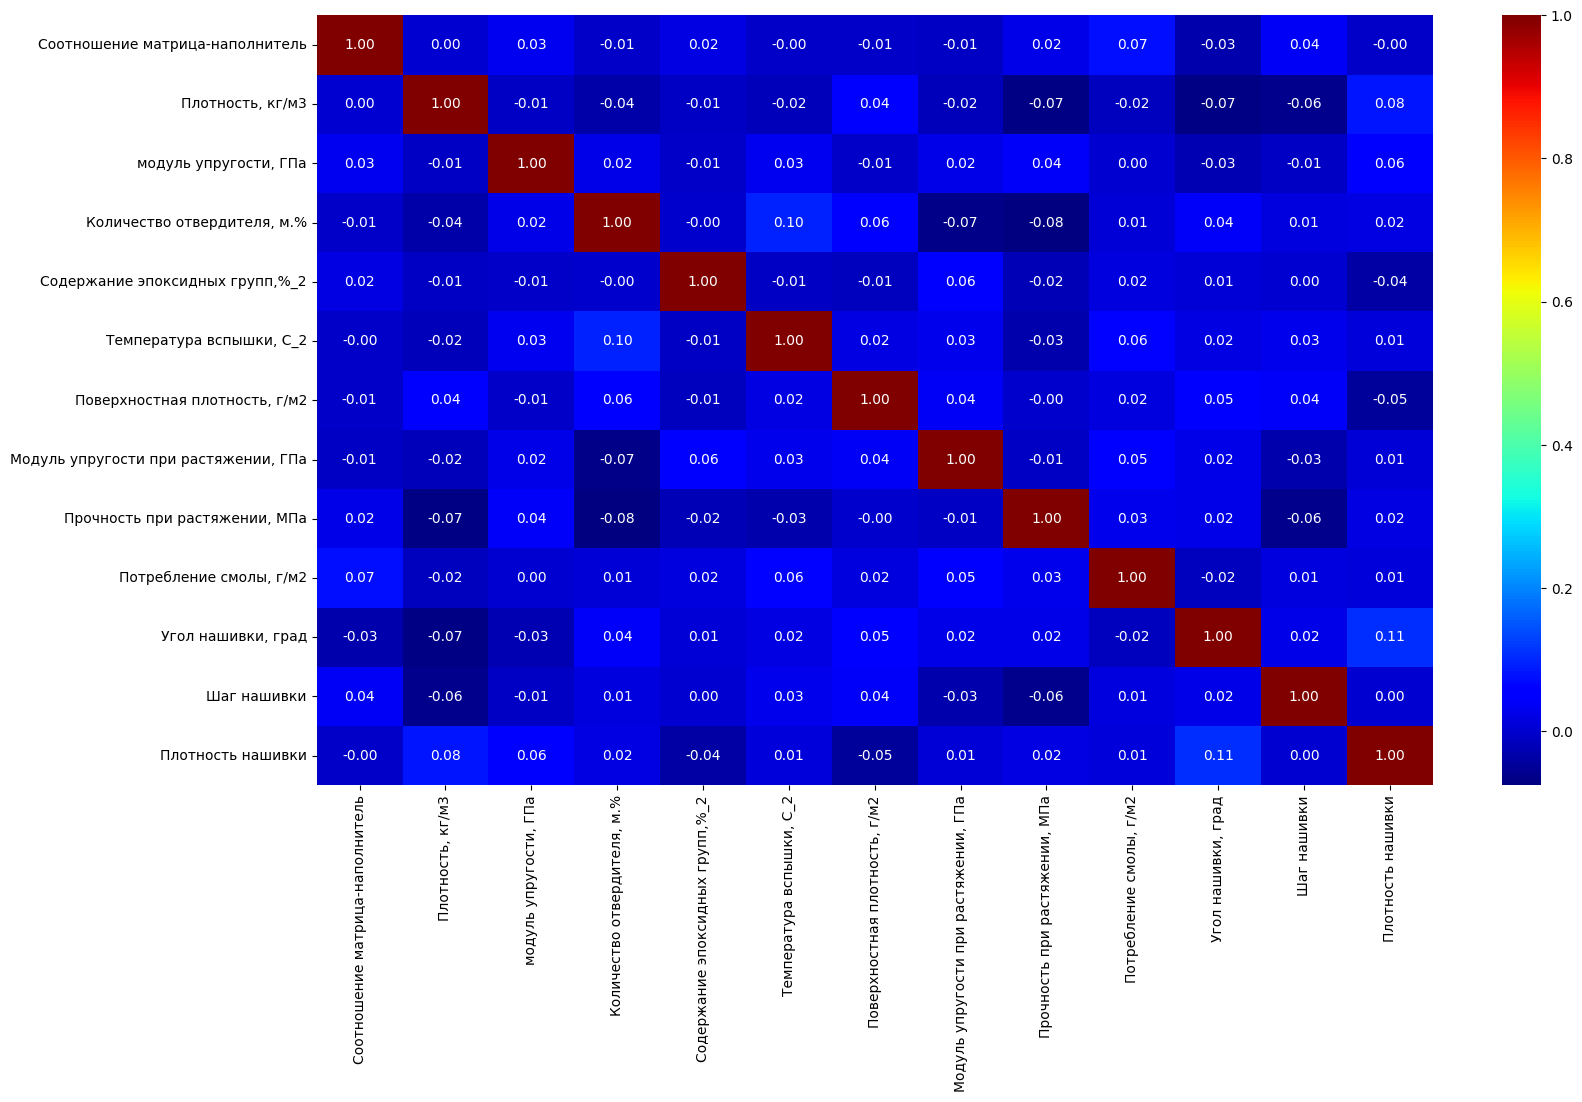

In [10]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(df.corr(), annot=True, ax=ax, cmap='jet', fmt='.2f')
plt.show()

Исследуем линейную зависимость попарно

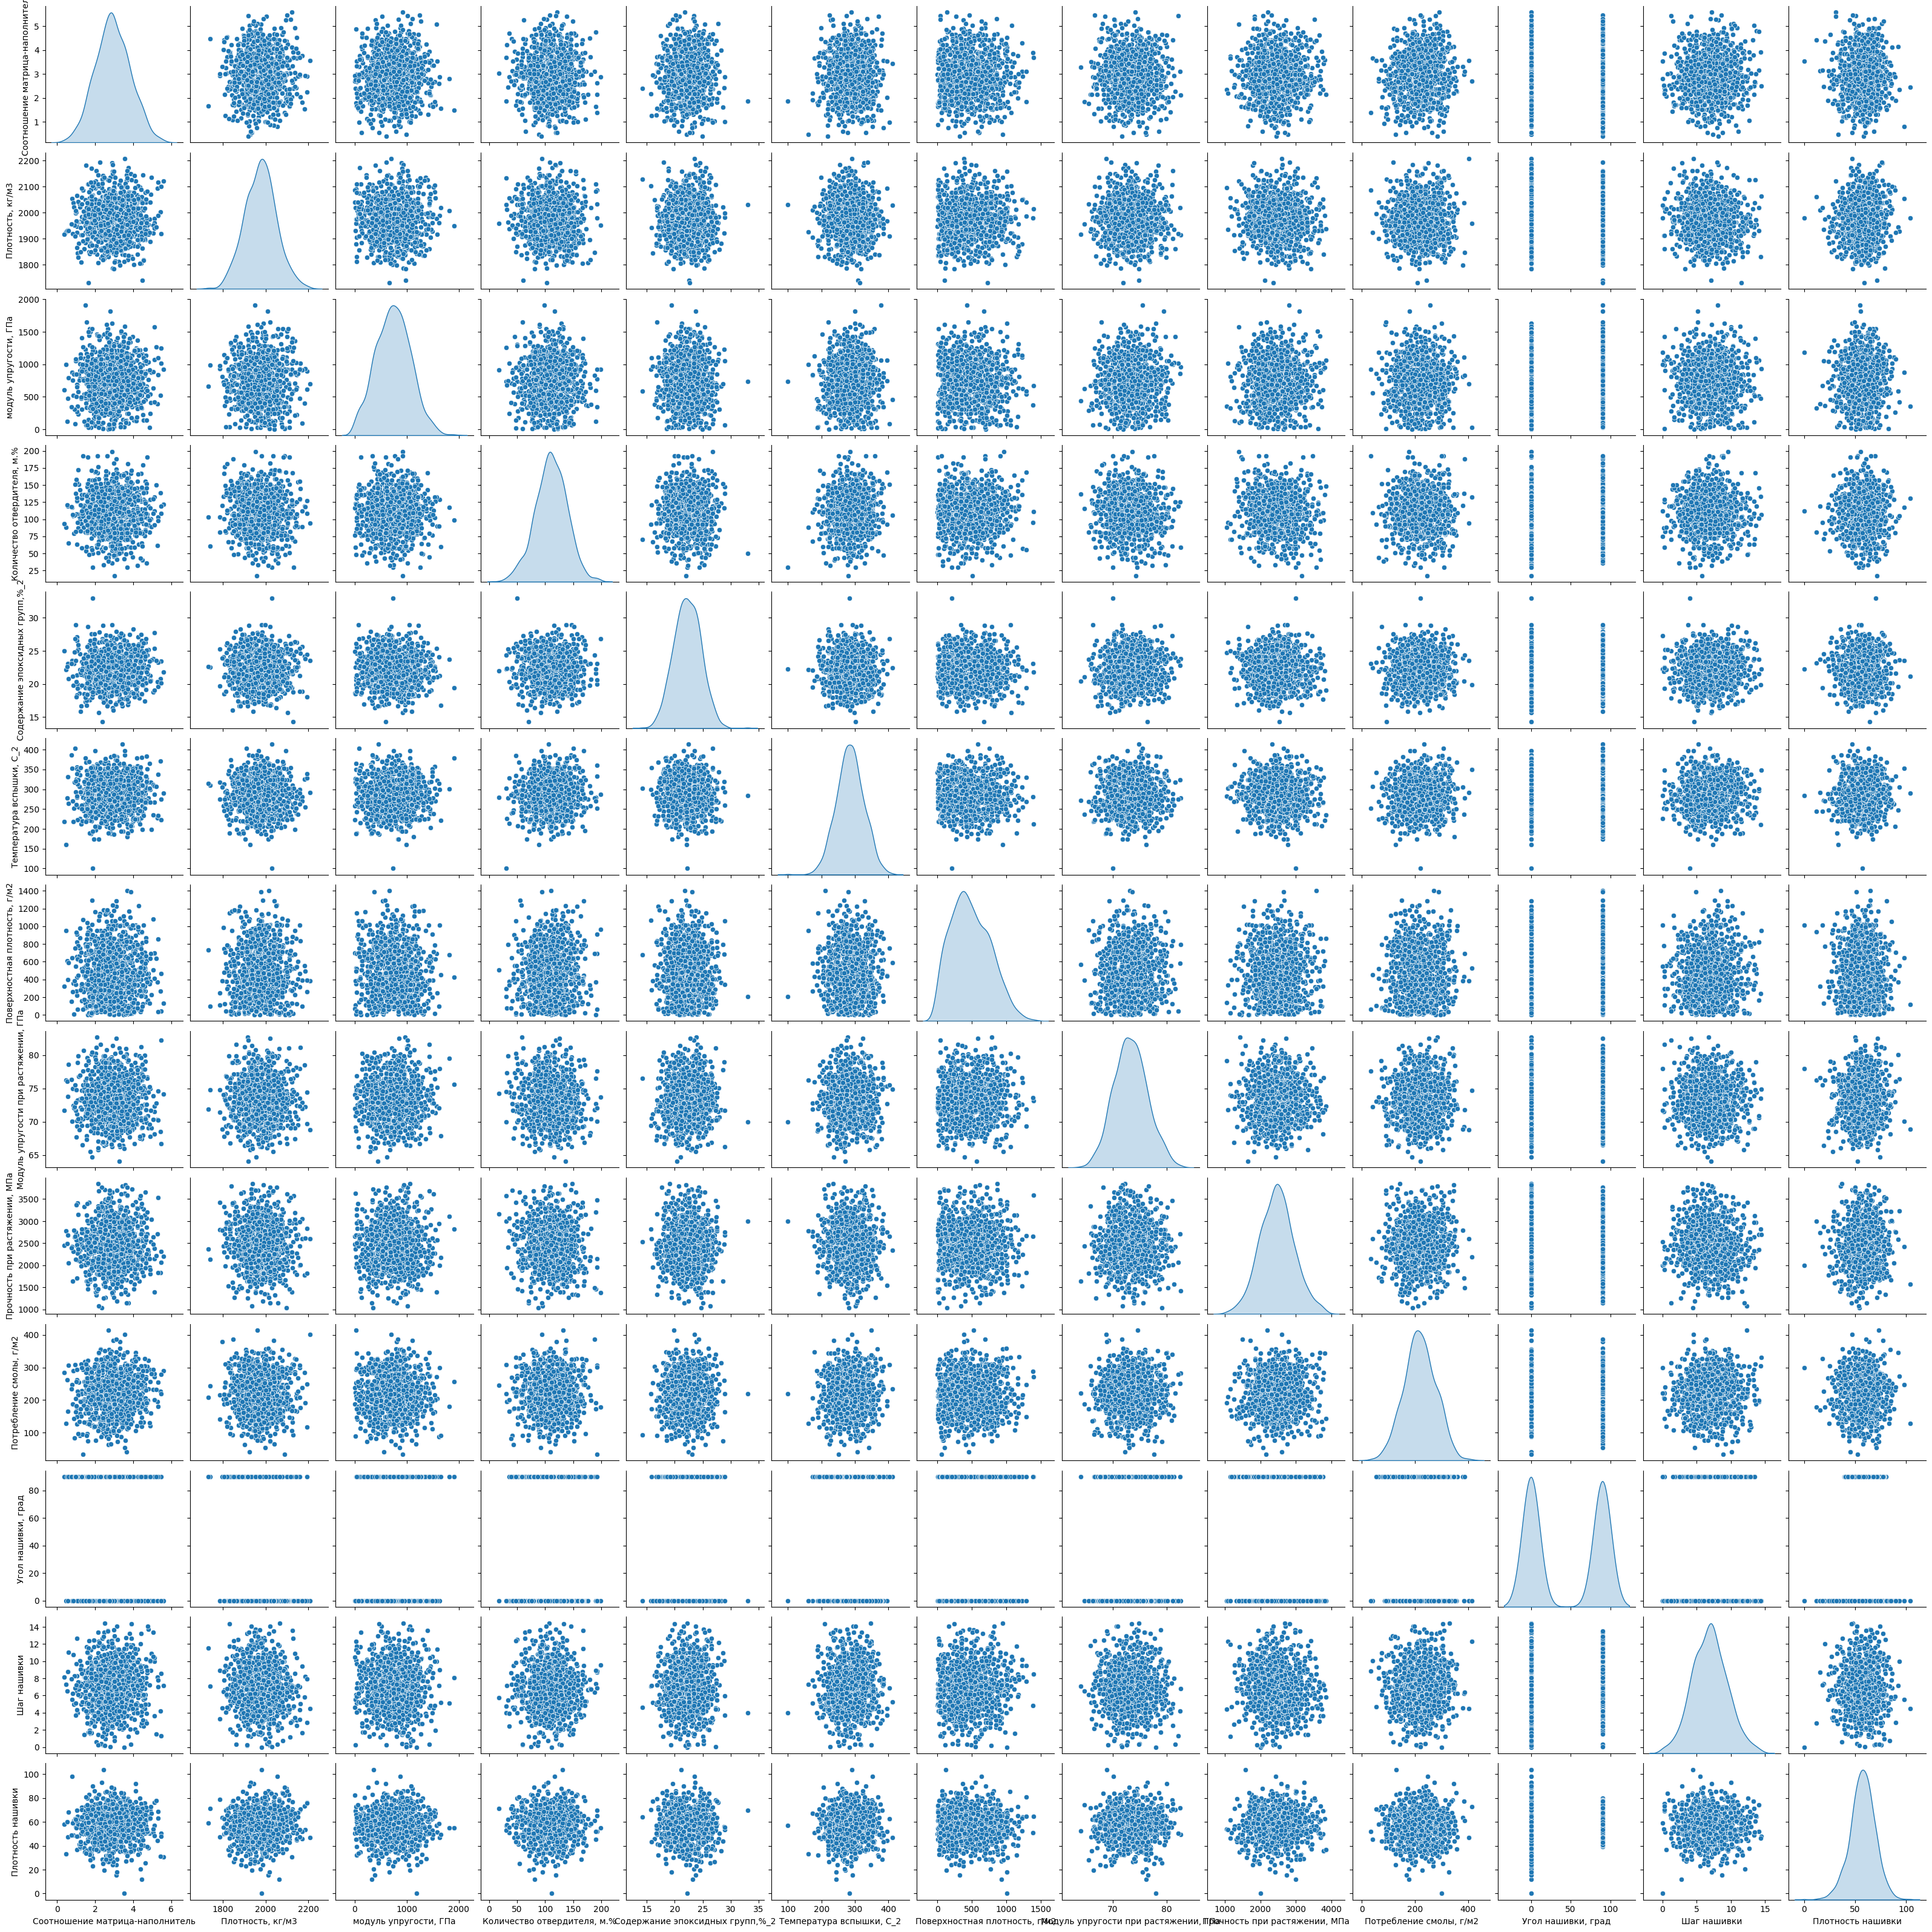

In [11]:
sns.pairplot(df, diag_kind='kde')